<a href="https://colab.research.google.com/github/alexandreleitetrevisani/DATA_SCIENCE_MACHINE_LEARNING/blob/master/LondonBikesSharing_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBeckend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22,10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('https://storage.googleapis.com/kagglesdsdata/datasets/376751/731448/london_merged.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1590686398&Signature=KUtgcclrWVqoATvNP245z20rN6%2BAtvCoVug6p2%2FRHN0DKrXP4h3LWaKgSujieqRA6jooWjrDbI9oJoU4yHlj7ZJT7%2Bf3oip2E7YdwyllFQUy5GI6ombJTQITLnugoVoCQmRGzTcbzmksFvrhNqe0ZpcHi9SRnT6tSsT5nljjUy%2BCVCKATG8M0ooDvpFdl%2BH5CFhTcoL3aHklGU3udkMKXPQcH0N5lo7k243YGdmru6dOger2oSn3oLZ%2Bc9%2BO8srkdnCnt1hP0fbzi9C%2B8zG6U3bGUsb%2FH6OOXbD89MZ%2FTEnuiXQAjYRUTp0fVb%2BBGCDJaL4xfjyBS6rl%2BJlclEJkEA%3D%3D&response-content-disposition=attachment%3B+filename%3Dlondon_merged.csv', parse_dates=['timestamp'], index_col='timestamp')

In [3]:
df.shape

(17414, 9)

In [4]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [0]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [6]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1


In [9]:
df.index

DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

In [10]:
df.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'hour', 'day_of_month', 'day_of_week', 'month'],
      dtype='object')

In [7]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


In [0]:
from sklearn.preprocessing import RobustScaler

In [20]:
f_columns = ['t1', 't2', 'hum', 'wind_speed']

f_transformer = RobustScaler()

cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())

cnt_transformer = cnt_transformer.fit(train[['cnt']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

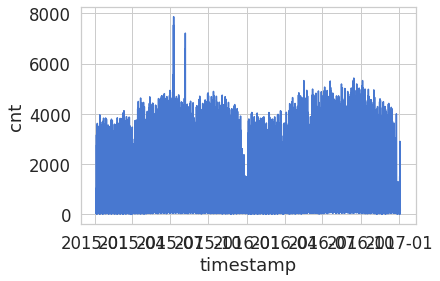

In [11]:
sns.lineplot(x=df.index, y='cnt', data=df)

In [13]:
df_by_month = df.resample('M').sum()
df_by_month

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-31,546639,4101.000000,2255.500000,51005.00,12502.000000,2211.0,0.0,192.0,2013.0,7709,11753,2014,671
2015-02-28,543594,3721.500000,1868.000000,51950.00,9873.500000,2409.0,0.0,192.0,2013.0,7707,9734,2015,1342
2015-03-31,695934,6093.500000,4558.500000,51832.25,12938.250000,1940.0,0.0,215.0,0.0,8540,11751,2174,2217
2015-04-30,831582,7873.000000,7112.500000,48468.00,10988.500000,1642.0,48.0,191.0,0.0,8270,11156,2131,2876
2015-05-31,895413,10091.500000,9803.500000,47939.00,14268.500000,1900.0,48.0,240.0,0.0,8556,11904,2376,3720
2015-06-30,1033252,12151.500000,12073.000000,44371.50,12398.000000,1457.0,0.0,192.0,717.0,8268,11145,2028,4302
2015-07-31,1120687,14107.000000,14060.000000,46632.50,13067.000000,1710.0,0.0,192.0,740.0,8508,11831,2232,5180
2015-08-31,1033951,13830.500000,13816.500000,51913.50,10326.000000,1948.0,24.0,240.0,744.0,8556,11904,2280,5952
2015-09-30,892478,10371.000000,10357.500000,52002.00,9394.000000,1683.0,0.0,185.0,1422.0,8210,11047,2045,6399


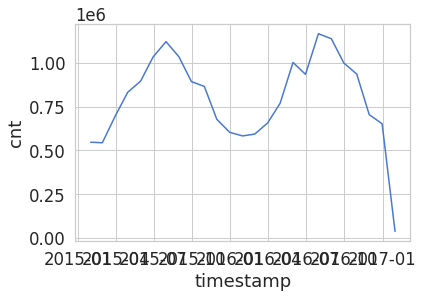

In [14]:
sns.lineplot(x=df_by_month.index, y='cnt', data=df_by_month)

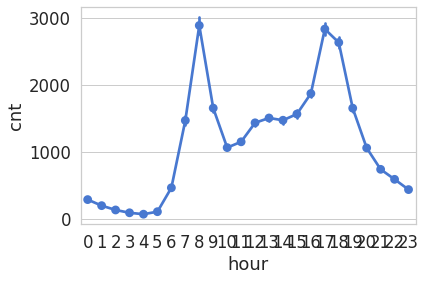

In [15]:
sns.pointplot(data=df, x='hour', y='cnt')

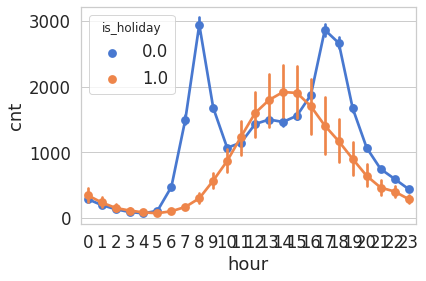

In [16]:
sns.pointplot(data=df, x='hour', y='cnt', hue='is_holiday' )

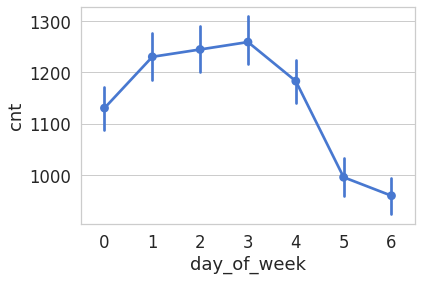

In [17]:
sns.pointplot(data=df, x='day_of_week', y='cnt')

In [0]:
def create_dataset(x, y, time_steps=1):
    xs, ys = [], []
    for i in range(len(x) - time_steps):
        v = x.iloc[i: (i + time_steps)].to_numpy()
        xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(xs), np.array(ys)

In [0]:
time_steps = 24

x_train, y_train = create_dataset(train, train.cnt, time_steps=time_steps)
x_test, y_test = create_dataset(test, test.cnt, time_steps=time_steps)


In [23]:
print(x_train.shape, y_train.shape)

(15648, 24, 13) (15648,)


In [24]:
print(x_test.shape, y_test.shape)

(1718, 24, 13) (1718,)


In [0]:
model = keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=128, input_shape=(x_train.shape[1], x_train.shape[2]))))

model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))


In [0]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.1, shuffle=False )


Epoch 1/30

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

441/441 [==============================] - 18s 40ms/step - loss: 0.3253 - val_loss: 0.1743
Epoch 2/30
441/441 [==============================] - 17s 38ms/step - loss: 0.1105 - val_loss: 0.0730
Epoch 3/30
441/441 [==============================] - 17s 38ms/step - loss: 0.0622 - val_loss: 0.0609
Epoch 4/30
441/441 [==============================] - 17s 38ms/step - loss: 0.0458 - val_loss: 0.0400
Epoch 5/30
441/441 [==============================] - 17s 38ms/step - loss: 0.0379 - val_loss: 0.037

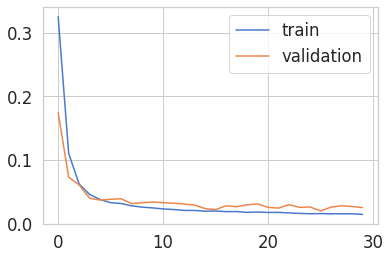

In [29]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

In [0]:
y_pred = model.predict(x_test)

In [0]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1,-1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

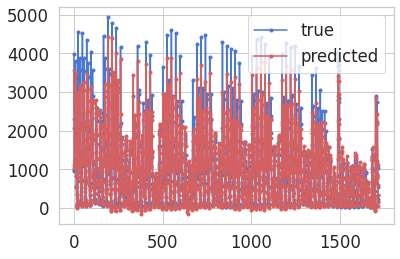

In [34]:
plt.plot(y_test_inv.flatten(), marker='.', label='true')
plt.plot(y_pred_inv.flatten(), 'r',marker='.', label='predicted')
plt.legend()